In [26]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# pip install nltk
# pip install sastrawi
# pakai command di atas ya untuk instalasi librarynya
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Ini library library yang dibutuhkan

In [27]:
df = pd.read_csv('cleanedToba.csv')

deletedColumn = ['link','image_url', 'address', 'opening_hours', 'latitude','longitude', 'skor_heatmap','kecamatan', 'rating', 'reviews']
df.drop(deletedColumn, axis=1, inplace=True)

In [28]:
df.head(2)

,title,kategori,aktivitas,deskripsi
0,Hill of Gibeon,Alam,"Aktivitas Air, Berenang, Pemandangan, Santai, ...","Terletak di Kabupaten Toba, Sumatera Utara, Bu..."
1,Situmurun Waterfall,Bahari,"Perahu, Berenang, Pemandangan, Fotografi","Air Terjun Situmurun, yang berlokasi di Jonggi..."


Pada fitur kategori, aktivitas, deskripsi. Kita akan melakukan Text Preprocessing seperti: 
- Membuat semua menjadi lowercase, 
- Menghapus punctuation (tanda baca seperti . ! ? dll), 
- dan Menghapus stopword (seperti kata 'yang', 'ke', dll)
- dll

In [29]:
import ast

def convert(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [30]:
# Buat Semua Jadi Huruf Kecil
df[['kategori', 'aktivitas', 'deskripsi']] = df[['kategori', 'aktivitas', 'deskripsi']].apply(lambda x: x.str.lower())


Mengubah semua menjadi huruf kecil

In [31]:
import string
# Tokenisasi: pisah berdasarkan koma, hapus spasi, buang kosong
df['aktivitas_token'] = df['aktivitas'].apply(
    lambda x: [item.strip() for item in x.split(',') if item.strip()]
)

# Tokenisasi Kategori
df['kategori_token'] = df['kategori'].apply(
    lambda x: [item.strip() for item in x.split(',') if item.strip()]
)

# Tokenisasi Deskripsi sekalian menghilangkan tanda baca
df['deskripsi_token'] = df['deskripsi'].apply(
    lambda x: [word for word in word_tokenize(x) if word.isalpha()] if isinstance(x, str) else []
)



Proses Tokenisasi pada aktivitas, kategori. untuk deskripsi langsung lakukan proses tokenisasi dan menghilangkan tanda baca

In [32]:
df

,title,kategori,aktivitas,deskripsi,aktivitas_token,kategori_token,deskripsi_token
0,Hill of Gibeon,alam,"aktivitas air, berenang, pemandangan, santai, ...","terletak di kabupaten toba, sumatera utara, bu...","[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar..."
1,Situmurun Waterfall,bahari,"perahu, berenang, pemandangan, fotografi","air terjun situmurun, yang berlokasi di jonggi...","[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ..."
2,Danau Toba Parapat,bahari,"perahu, berenang, jet ski, banana boat, kayak,...",danau toba di area parapat adalah bagian dari ...,"[perahu, berenang, jet ski, banana boat, kayak...",[bahari],"[danau, toba, di, area, parapat, adalah, bagia..."
3,Pantai Ikan Mas Tandarabun,bahari,"berenang, memancing, perahu, santai, pemandangan",pantai ikan mas tandarabun adalah destinasi te...,"[berenang, memancing, perahu, santai, pemandan...",[bahari],"[pantai, ikan, mas, tandarabun, adalah, destin..."
4,Bukit Burung,alam,"pemandangan, trekking, fauna, santai, fotografi","terletak di siboro, kecamatan sianjur mula mul...","[pemandangan, trekking, fauna, santai, fotografi]",[alam],"[terletak, di, siboro, kecamatan, sianjur, mul..."
...,...,...,...,...,...,...,...
133,Ruang Terbuka Publik Parapat,alam,"pemandangan, santai, fotografi, aktivitas air,...",ruang terbuka publik parapat adalah area publi...,"[pemandangan, santai, fotografi, aktivitas air...",[alam],"[ruang, terbuka, publik, parapat, adalah, area..."
134,Penatapan Simarjarunjung,alam,"pemandangan, fotografi, santai",penatapan simarjarunjung adalah titik pandang ...,"[pemandangan, fotografi, santai]",[alam],"[penatapan, simarjarunjung, adalah, titik, pan..."
135,Camping Ground - Parapat,alam,"fotografi, piknik, pemandangan",camping ground – parapat adalah destinasi wisa...,"[fotografi, piknik, pemandangan]",[alam],"[camping, ground, parapat, adalah, destinasi, ..."
136,Bukit Sipolha,alam,"santai, pemandangan",bukit sipolha adalah sebuah destinasi wisata y...,"[santai, pemandangan]",[alam],"[bukit, sipolha, adalah, sebuah, destinasi, wi..."


Lihat hasil perbandingannya

In [33]:
dropColumn = ['kategori', 'aktivitas', 'deskripsi']
df.drop(dropColumn, axis=1, inplace=True)

In [34]:
df.head(2)

,title,aktivitas_token,kategori_token,deskripsi_token
0,Hill of Gibeon,"[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar..."
1,Situmurun Waterfall,"[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ..."


In [35]:
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()

print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Kita akan menghapus stopword pada kolom deskripsi, ini adalah list stopword yang ada di kamus bahasa indonesia

In [36]:
def stopword_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens

Fungsi untuk menghilangkan stopword

In [37]:
df['deskripsi_stop'] = df['deskripsi_token'].apply(stopword_text)

In [38]:
df

,title,aktivitas_token,kategori_token,deskripsi_token,deskripsi_stop
0,Hill of Gibeon,"[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar...","[terletak, kabupaten, toba, sumatera, utara, b..."
1,Situmurun Waterfall,"[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ...","[air, terjun, situmurun, berlokasi, jonggi, ni..."
2,Danau Toba Parapat,"[perahu, berenang, jet ski, banana boat, kayak...",[bahari],"[danau, toba, di, area, parapat, adalah, bagia...","[danau, toba, area, parapat, bagian, danau, vu..."
3,Pantai Ikan Mas Tandarabun,"[berenang, memancing, perahu, santai, pemandan...",[bahari],"[pantai, ikan, mas, tandarabun, adalah, destin...","[pantai, ikan, mas, tandarabun, destinasi, ter..."
4,Bukit Burung,"[pemandangan, trekking, fauna, santai, fotografi]",[alam],"[terletak, di, siboro, kecamatan, sianjur, mul...","[terletak, siboro, kecamatan, sianjur, mula, m..."
...,...,...,...,...,...
133,Ruang Terbuka Publik Parapat,"[pemandangan, santai, fotografi, aktivitas air...",[alam],"[ruang, terbuka, publik, parapat, adalah, area...","[ruang, terbuka, publik, parapat, area, publik..."
134,Penatapan Simarjarunjung,"[pemandangan, fotografi, santai]",[alam],"[penatapan, simarjarunjung, adalah, titik, pan...","[penatapan, simarjarunjung, titik, pandang, po..."
135,Camping Ground - Parapat,"[fotografi, piknik, pemandangan]",[alam],"[camping, ground, parapat, adalah, destinasi, ...","[camping, ground, parapat, destinasi, wisata, ..."
136,Bukit Sipolha,"[santai, pemandangan]",[alam],"[bukit, sipolha, adalah, sebuah, destinasi, wi...","[bukit, sipolha, sebuah, destinasi, wisata, me..."


Lihat hasil perbandingannya

In [39]:
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()
#df.drop('deskripsi_token', axis=1, inplace=True)

def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

Ini fungsi stemming

In [40]:
df['deskripsi_stemming'] = df['deskripsi_stop'].apply(stemming_text)

lakukan Stemming

In [41]:
df

,title,aktivitas_token,kategori_token,deskripsi_token,deskripsi_stop,deskripsi_stemming
0,Hill of Gibeon,"[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar...","[terletak, kabupaten, toba, sumatera, utara, b...","[letak, kabupaten, toba, sumatera, utara, buki..."
1,Situmurun Waterfall,"[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ...","[air, terjun, situmurun, berlokasi, jonggi, ni...","[air, terjun, situmurun, lokasi, jonggi, nihut..."
2,Danau Toba Parapat,"[perahu, berenang, jet ski, banana boat, kayak...",[bahari],"[danau, toba, di, area, parapat, adalah, bagia...","[danau, toba, area, parapat, bagian, danau, vu...","[danau, toba, area, parapat, bagi, danau, vulk..."
3,Pantai Ikan Mas Tandarabun,"[berenang, memancing, perahu, santai, pemandan...",[bahari],"[pantai, ikan, mas, tandarabun, adalah, destin...","[pantai, ikan, mas, tandarabun, destinasi, ter...","[pantai, ikan, mas, tandarabun, destinasi, sem..."
4,Bukit Burung,"[pemandangan, trekking, fauna, santai, fotografi]",[alam],"[terletak, di, siboro, kecamatan, sianjur, mul...","[terletak, siboro, kecamatan, sianjur, mula, m...","[letak, siboro, camat, sianjur, mula, mula, ka..."
...,...,...,...,...,...,...
133,Ruang Terbuka Publik Parapat,"[pemandangan, santai, fotografi, aktivitas air...",[alam],"[ruang, terbuka, publik, parapat, adalah, area...","[ruang, terbuka, publik, parapat, area, publik...","[ruang, buka, publik, parapat, area, publik, j..."
134,Penatapan Simarjarunjung,"[pemandangan, fotografi, santai]",[alam],"[penatapan, simarjarunjung, adalah, titik, pan...","[penatapan, simarjarunjung, titik, pandang, po...","[tatap, simarjarunjung, titik, pandang, popule..."
135,Camping Ground - Parapat,"[fotografi, piknik, pemandangan]",[alam],"[camping, ground, parapat, adalah, destinasi, ...","[camping, ground, parapat, destinasi, wisata, ...","[camping, ground, parapat, destinasi, wisata, ..."
136,Bukit Sipolha,"[santai, pemandangan]",[alam],"[bukit, sipolha, adalah, sebuah, destinasi, wi...","[bukit, sipolha, sebuah, destinasi, wisata, me...","[bukit, sipolha, buah, destinasi, wisata, tawa..."


Lihat hasil perbandingannya

In [42]:
#df.drop('deskripsi_stop', axis=1, inplace=True)

In [43]:
df['tags'] = df['aktivitas_token'] + df['kategori_token'] + df['deskripsi_stemming']
dropColumn = ['aktivitas_token', 'kategori_token', 'deskripsi_stemming']
#df.drop(dropColumn, axis=1, inplace=True)
df.head(2)

,title,aktivitas_token,kategori_token,deskripsi_token,deskripsi_stop,deskripsi_stemming,tags
0,Hill of Gibeon,"[aktivitas air, berenang, pemandangan, santai,...",[alam],"[terletak, di, kabupaten, toba, sumatera, utar...","[terletak, kabupaten, toba, sumatera, utara, b...","[letak, kabupaten, toba, sumatera, utara, buki...","[aktivitas air, berenang, pemandangan, santai,..."
1,Situmurun Waterfall,"[perahu, berenang, pemandangan, fotografi]",[bahari],"[air, terjun, situmurun, yang, berlokasi, di, ...","[air, terjun, situmurun, berlokasi, jonggi, ni...","[air, terjun, situmurun, lokasi, jonggi, nihut...","[perahu, berenang, pemandangan, fotografi, bah..."


In [44]:
all_tokens = [token for sublist in df['tags'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('alam', 258), ('danau', 224), ('toba', 153), ('pemandangan', 132), ('indah', 123), ('air', 117), ('tawar', 113), ('pandang', 108), ('fotografi', 107), ('bukit', 99), ('nikmat', 96), ('tempat', 89), ('pantai', 78), ('santai', 77), ('samosir', 76), ('jadi', 74), ('tenang', 73), ('wisata', 68), ('letak', 62), ('destinasi', 58), ('kabupaten', 54), ('suasana', 54), ('tinggi', 53), ('tepi', 51), ('unjung', 50), ('camping', 49), ('panorama', 47), ('pulau', 45), ('terjun', 44), ('hijau', 43), ('santa', 42), ('bahari', 38), ('trekking', 37), ('desa', 37), ('pasir', 35), ('piknik', 35), ('buah', 34), ('sumatera', 33), ('utara', 33), ('kenal', 33), ('alami', 32), ('lokasi', 31), ('luas', 31), ('camat', 31), ('berenang', 30), ('tarik', 30), ('kawasan', 30), ('area', 29), ('pukau', 29), ('bagai', 28), ('latar', 27), ('cocok', 27), ('putih', 26), ('keliling', 24), ('sejuk', 23), ('perahu', 23), ('spektakuler', 23), ('gunung', 23), ('udara', 22), ('utama', 22), ('aktivitas air', 21), ('unik', 21), 

Ini untuk Visualisasi

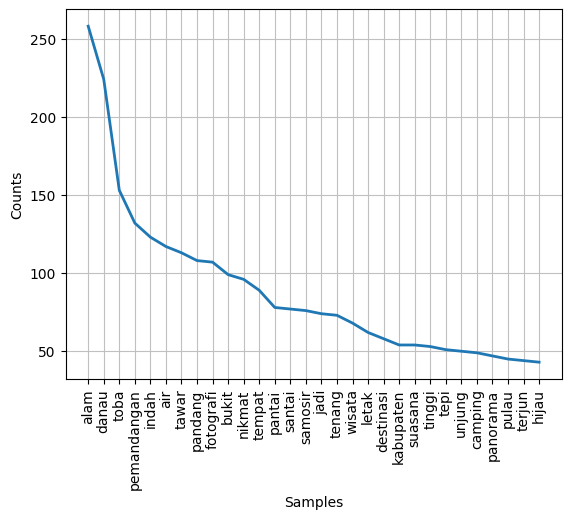

In [45]:
freq_dist.plot(30, cumulative=False)
plt.show()

Alam lebih sering muncul

In [46]:
df['tags_joined'] = df['tags'].apply(lambda x: ' '.join(x))
# dropColumn = ['aktivitas_token','deskripsi_token','deskripsi_stop','deskripsi_stemming','tags']
# df.drop(dropColumn, axis=1, inplace=True)
# df.to_csv("data_ProcessedZ.csv", index=False)
df['kategori'] = df['kategori_token'].apply(lambda x: ' '.join(x))



In [47]:
df.to_csv("../recommenderContentBased/data_Processed.csv", index=False)

In [48]:
# TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['tags_joined'])

In [49]:
similarity_matrix = cosine_similarity(tfidf_matrix)

In [50]:
def rekomendasi_tempat(nama_tempat, df, similarity_matrix, top_n=5):
    if nama_tempat not in df['title'].values:
        return f"Tempat '{nama_tempat}' tidak ditemukan dalam data."
    
    # Ambil index dari tempat
    idx = df[df['title'] == nama_tempat].index[0]
    
    # Ambil skor similarity-nya
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Urutkan berdasarkan skor tertinggi (kecuali dirinya sendiri)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+2]  # ambil top-n

    # Ambil hasil rekomendasi
    rekomendasi = []
    for i, score in sim_scores:
        rekomendasi.append({
            'title': df.iloc[i]['title'],
            'kategori': df.iloc[i]['kategori'],
            'similarity': round(score, 3)
        })
    
    return rekomendasi

In [51]:
rekomendasi = rekomendasi_tempat("Teluk Aek na Tio", df, similarity_matrix)
for r in rekomendasi:
    print(f"{r['title']} ({r['kategori']}) - Similarity: {r['similarity']}")


Air Mancur Menari Water Front Pangururan (alam) - Similarity: 0.255
Danau Toba Parapat (bahari) - Similarity: 0.215
Pantai Danau Toba Marom (bahari) - Similarity: 0.194
Tao Silalahi (alam) - Similarity: 0.193
Aek Batu Sipolha (bahari) - Similarity: 0.182
Danau Pea Na Bolak (alam) - Similarity: 0.179
